In [192]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import einops
from torch.nn import Softmax
import torch.nn.functional as F
import seaborn as sns

     |████████████████████████████████| 294 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 59.5 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1


In [128]:
!ls ../logs/cross

cross_step_101.p  cross_step_301.p  cross_step_51.p   cross_step_751.p
cross_step_151.p  cross_step_351.p  cross_step_551.p  cross_step_801.p
cross_step_1.p	  cross_step_401.p  cross_step_601.p  cross_step_851.p
cross_step_201.p  cross_step_451.p  cross_step_651.p  cross_step_901.p
cross_step_251.p  cross_step_501.p  cross_step_701.p  cross_step_951.p


In [5]:
for i, cmap in enumerate(cross_map):
    print(i, cmap.shape)

0 torch.Size([5, 4096, 72])
1 torch.Size([5, 4096, 72])
2 torch.Size([10, 1024, 72])
3 torch.Size([10, 1024, 72])
4 torch.Size([20, 256, 72])
5 torch.Size([20, 256, 72])


In [12]:
style_names = ['face', 'hair', 'headwear', 'top', 'outer', 'bottom', 'shoes', 'accesories']
style2id = {style: index for index, style in enumerate(style_names)}

In [159]:
pickle_filename = '../logs/cross/cross_step_701.p'
with open(pickle_filename, 'rb') as pickle_file:
    cross_map = pickle.load(pickle_file)

In [160]:
cmap = cross_map[1]
pixels = cmap.shape[1]
res = int(np.sqrt(pixels))
cmap = cmap.view(-1, pixels,  8, 9)
cmap = cmap.mean((0))
cmap = F.normalize(cmap, p=float('inf'), dim=0)
cmap = cmap.view(res, res, -1).cpu().numpy()


(64, 64, 72)


<AxesSubplot: >

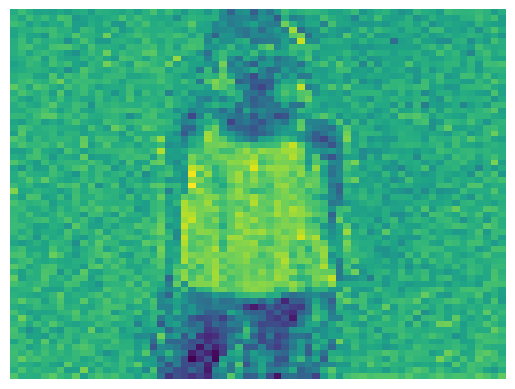

In [198]:
print(cmap.shape)
sns.heatmap(cmap[:,:,1], cmap='viridis', cbar=False, xticklabels=[], yticklabels=[])
sns.heatmap(cmap[:,:,1], cmap='viridis', cbar=False, xticklabels=[], yticklabels=[])

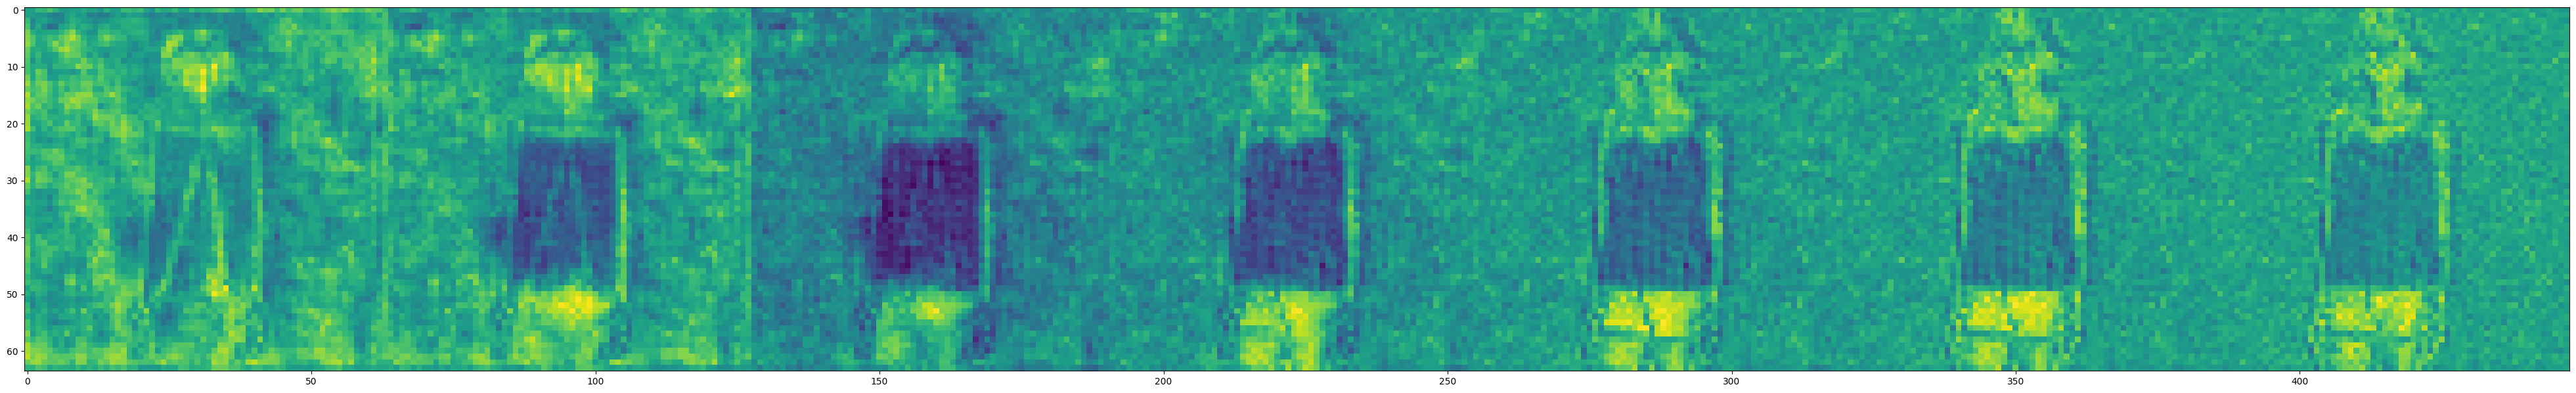

0


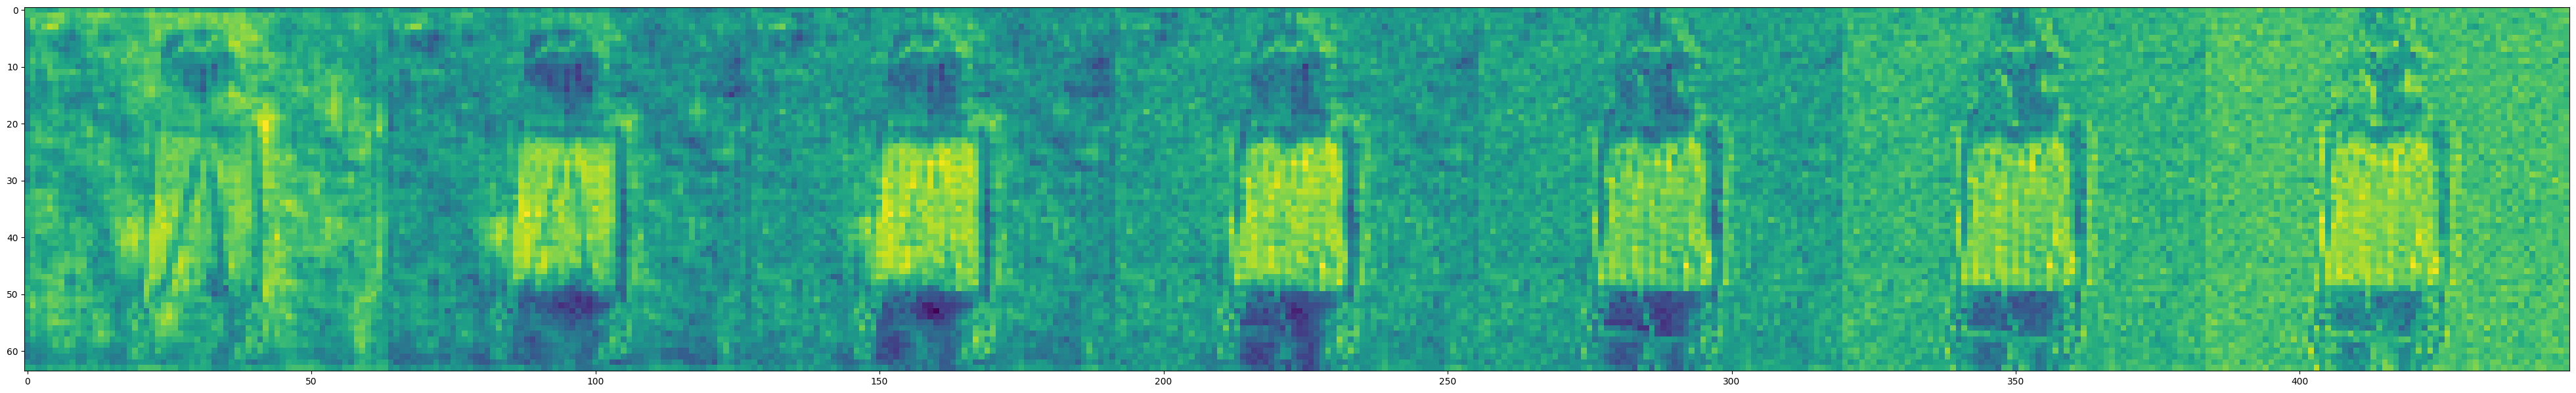

1


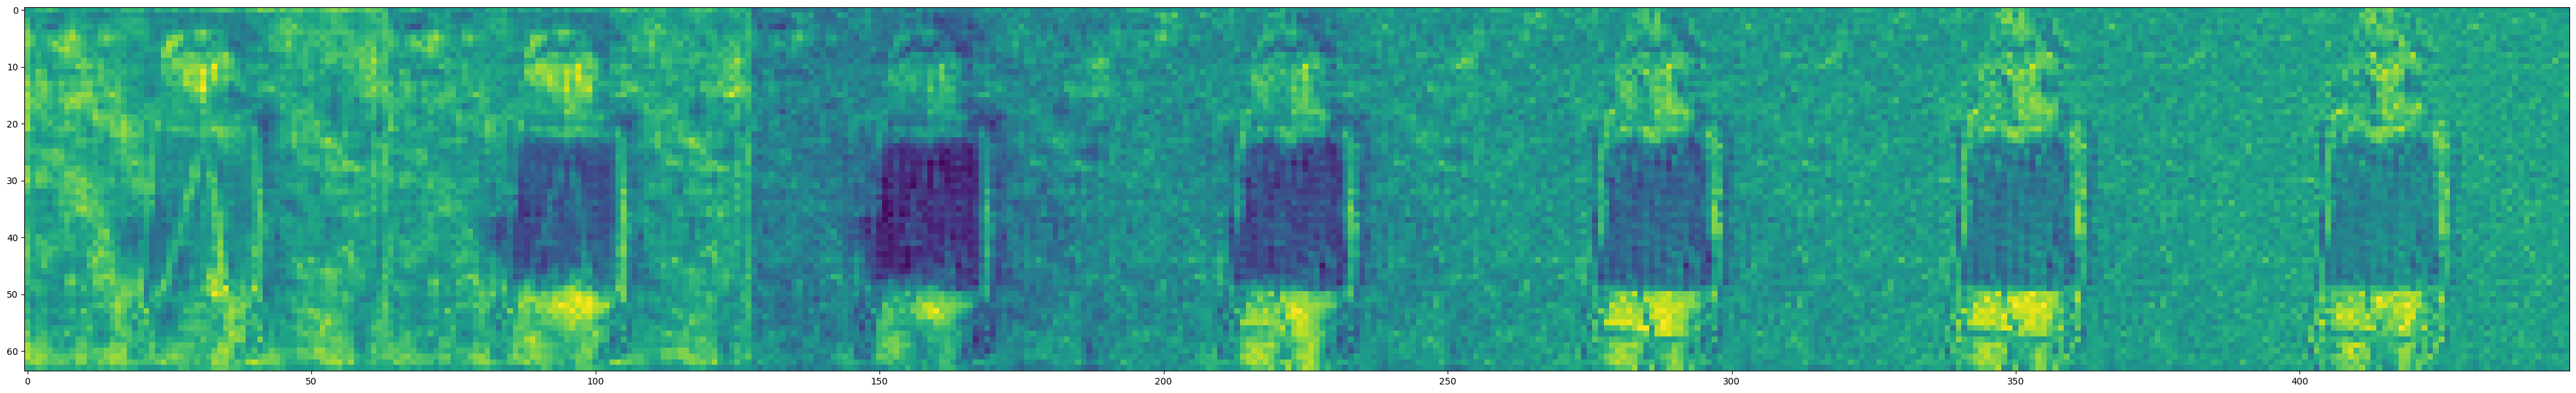

2


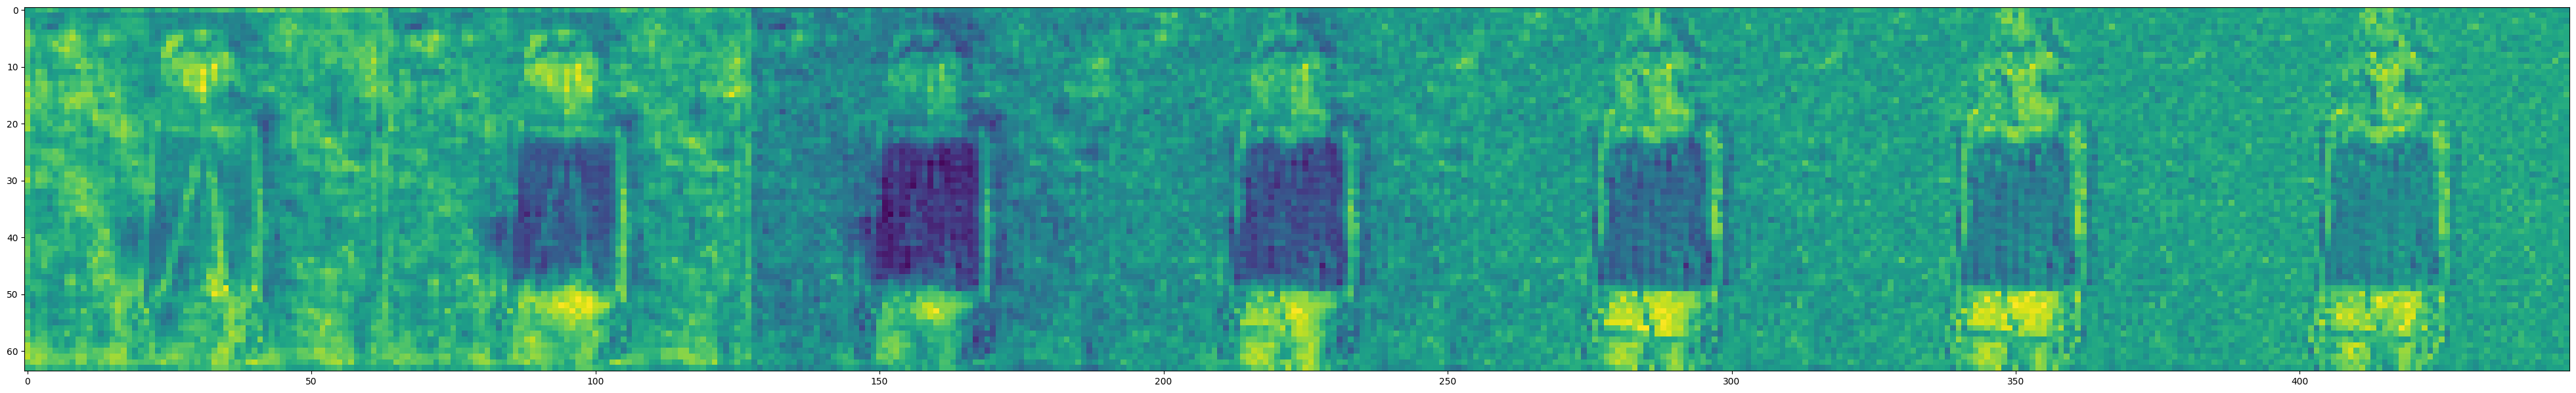

3


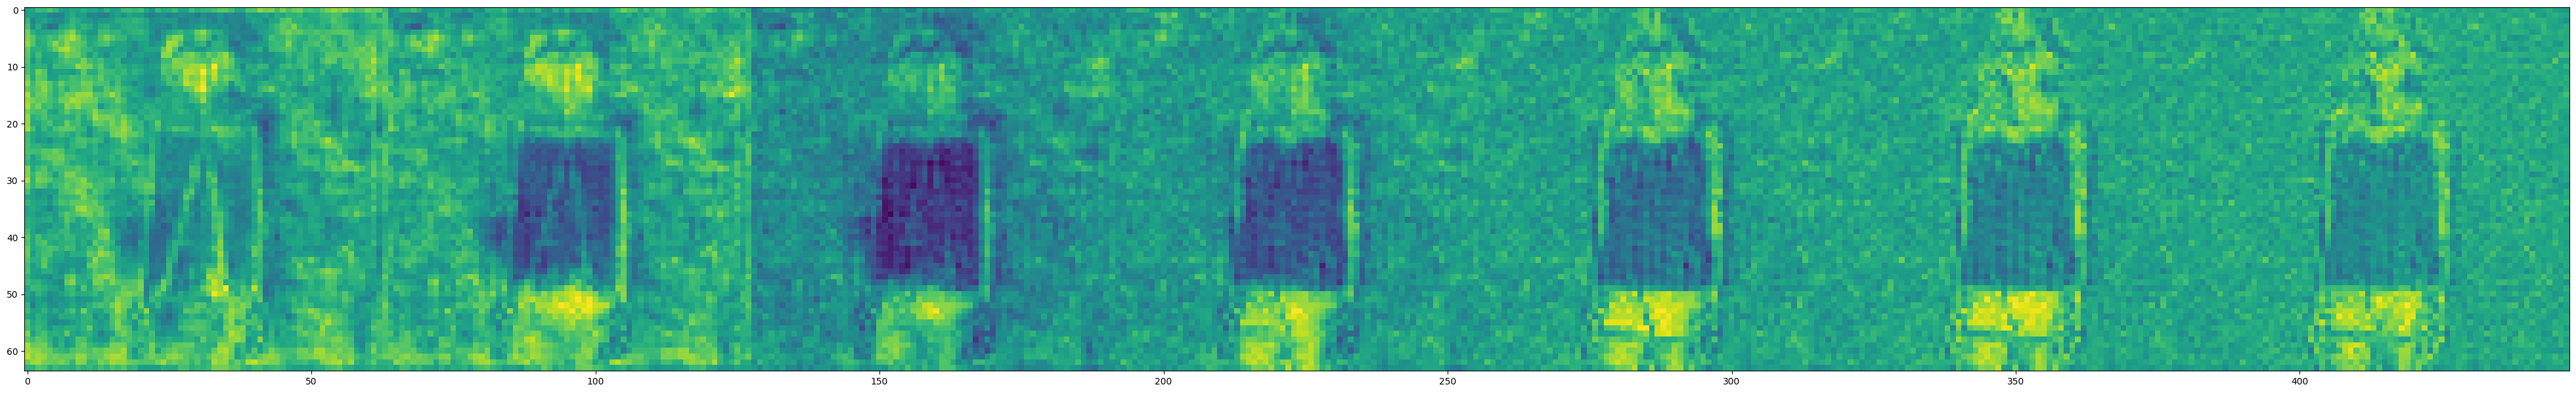

4


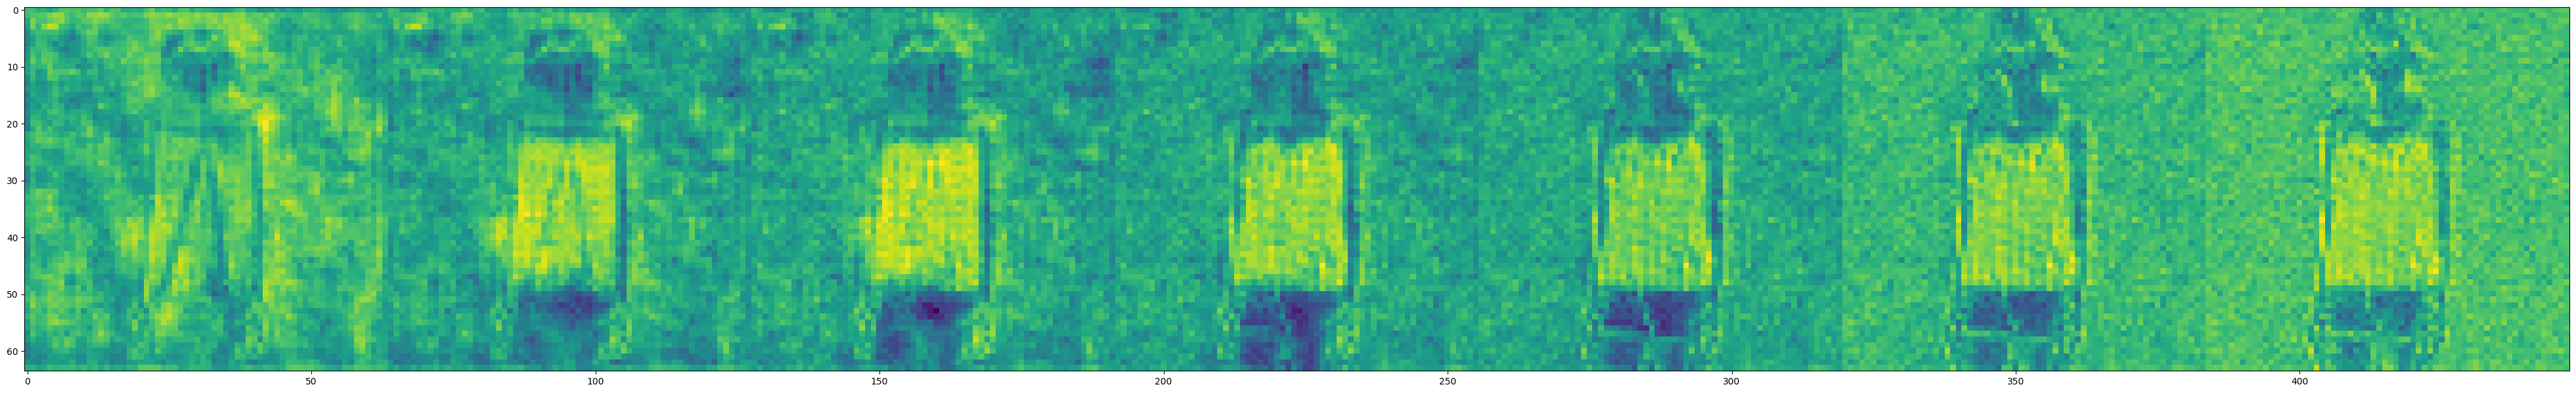

5


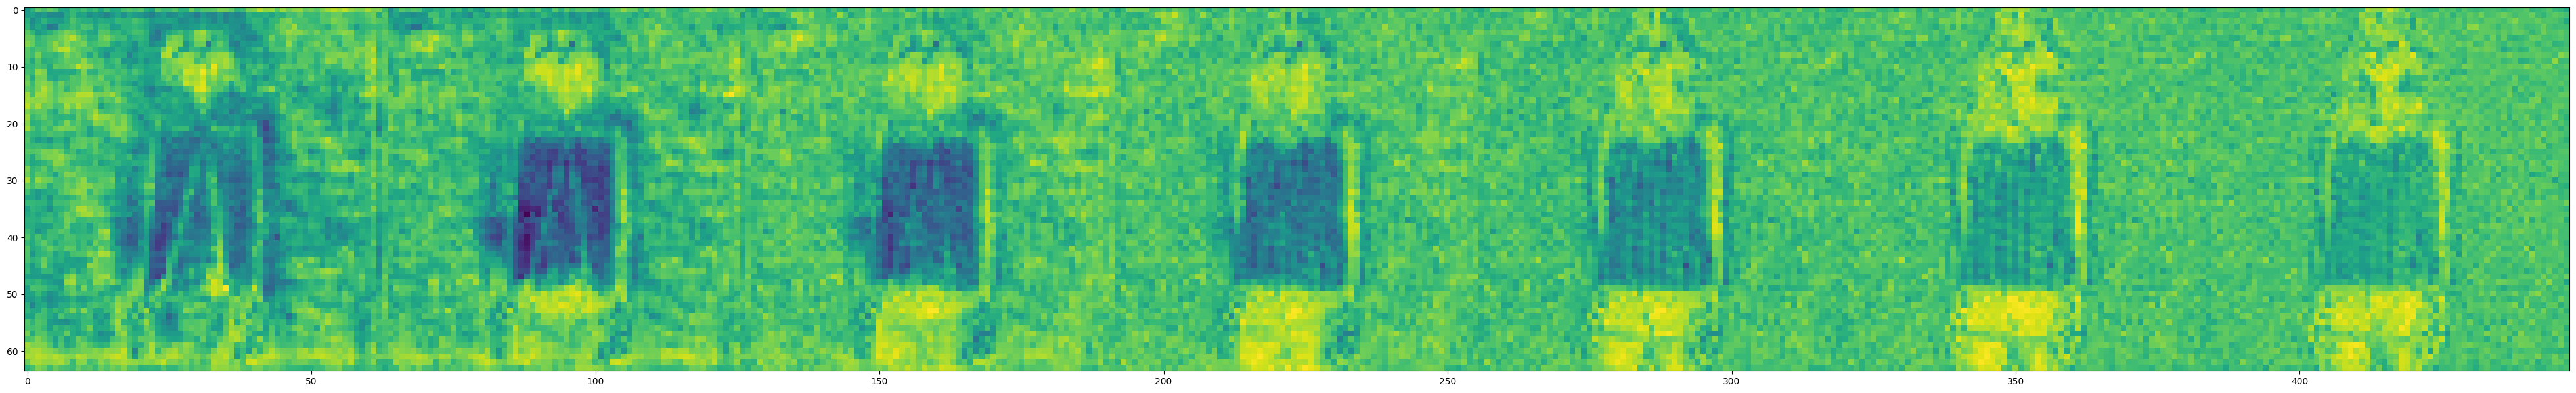

6


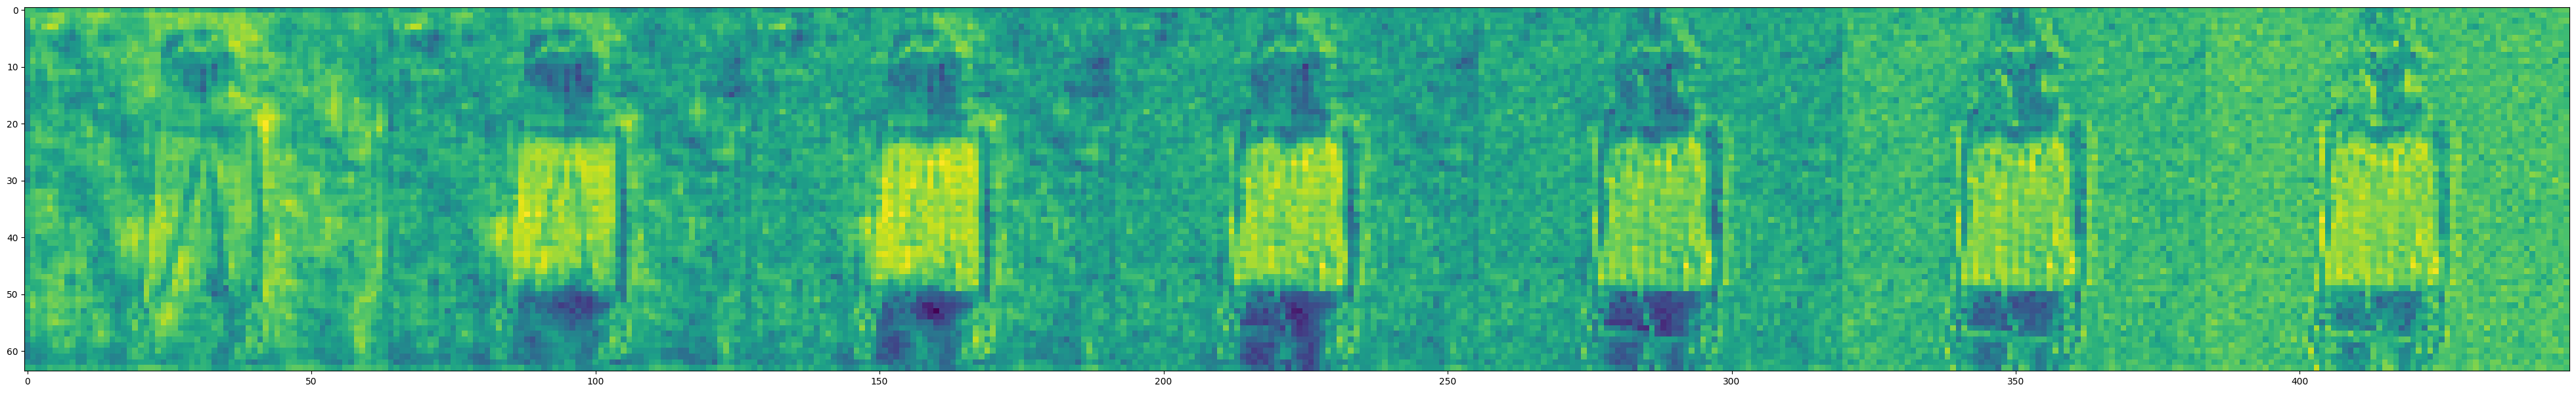

7


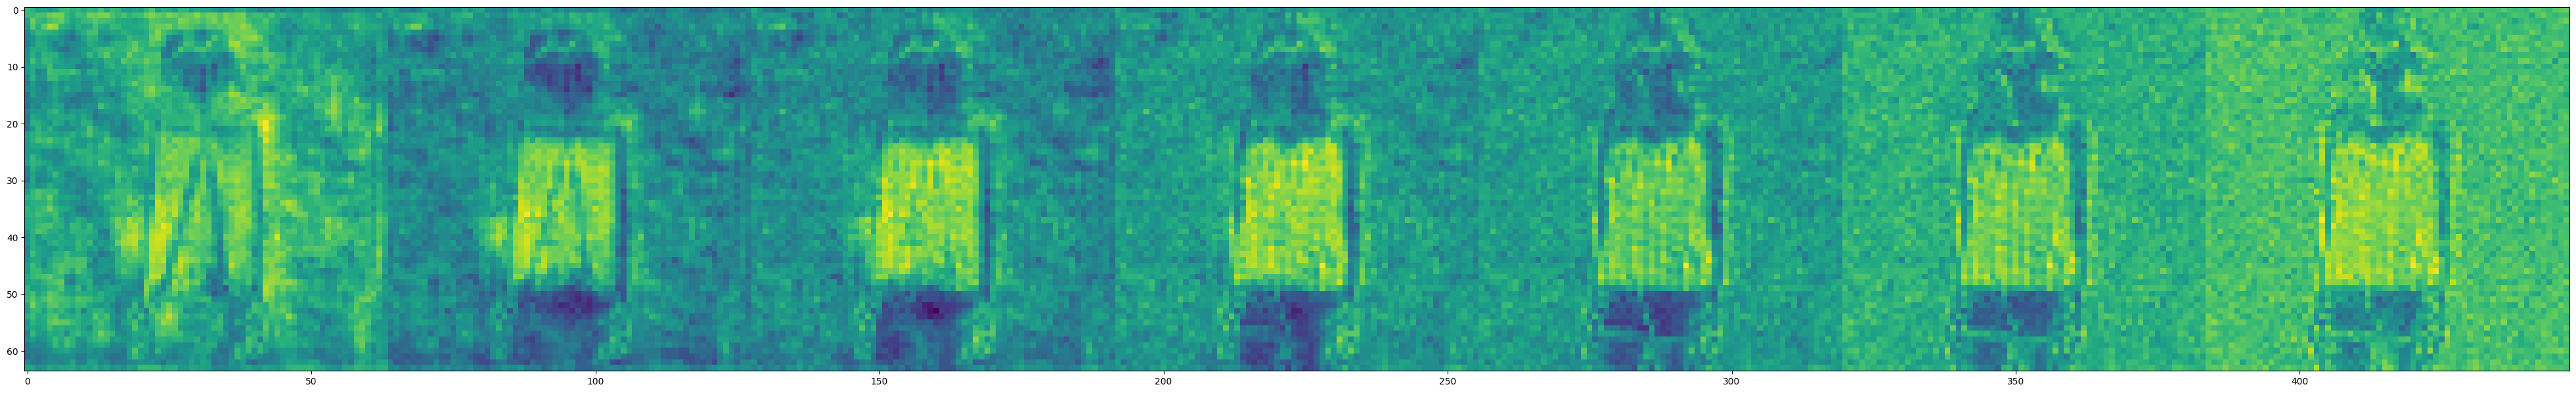

8


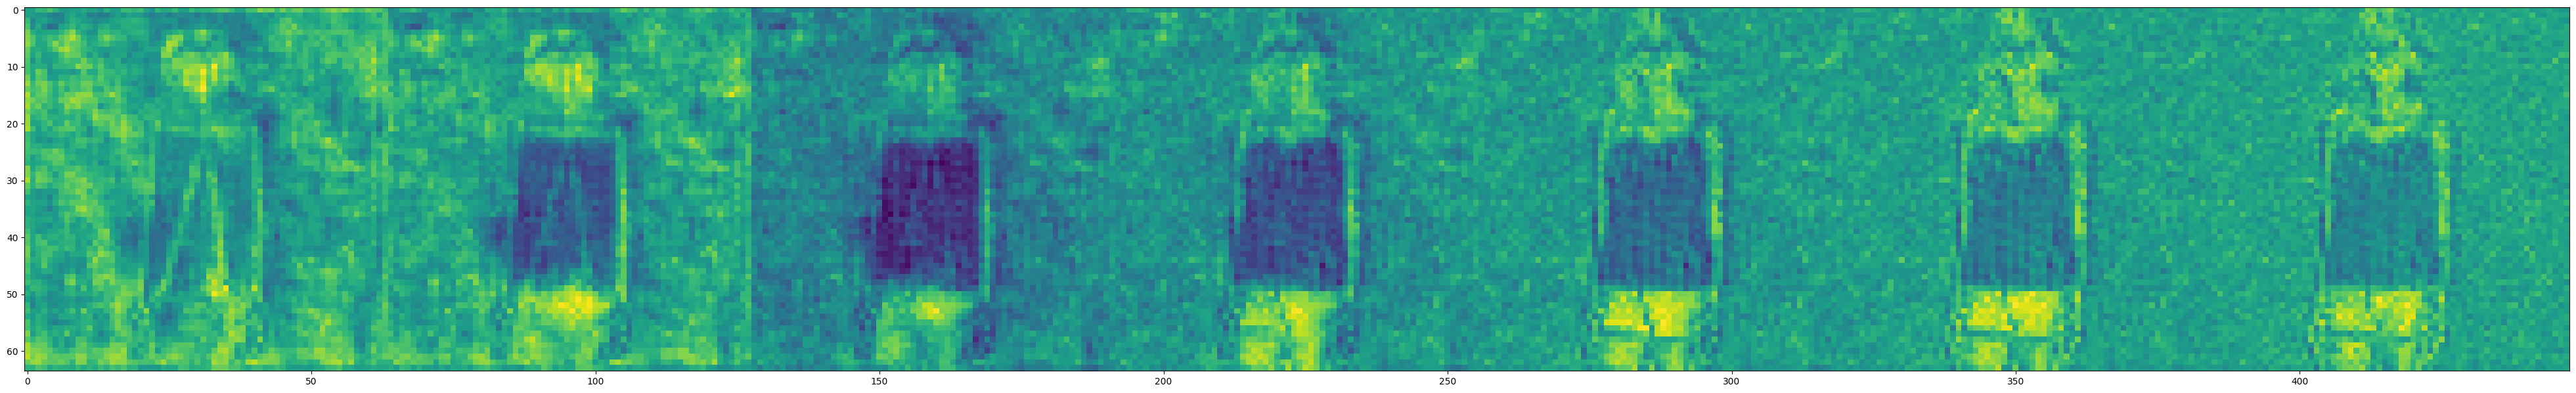

9


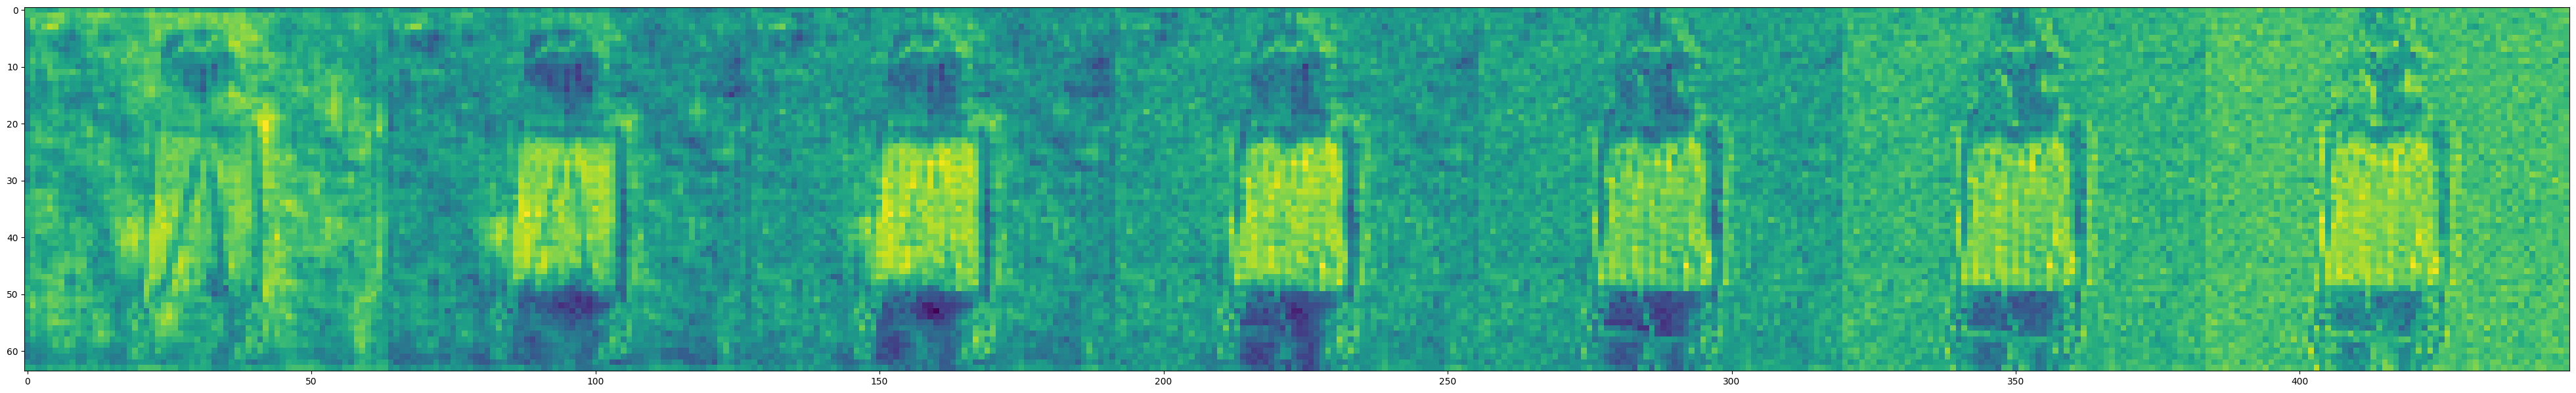

10


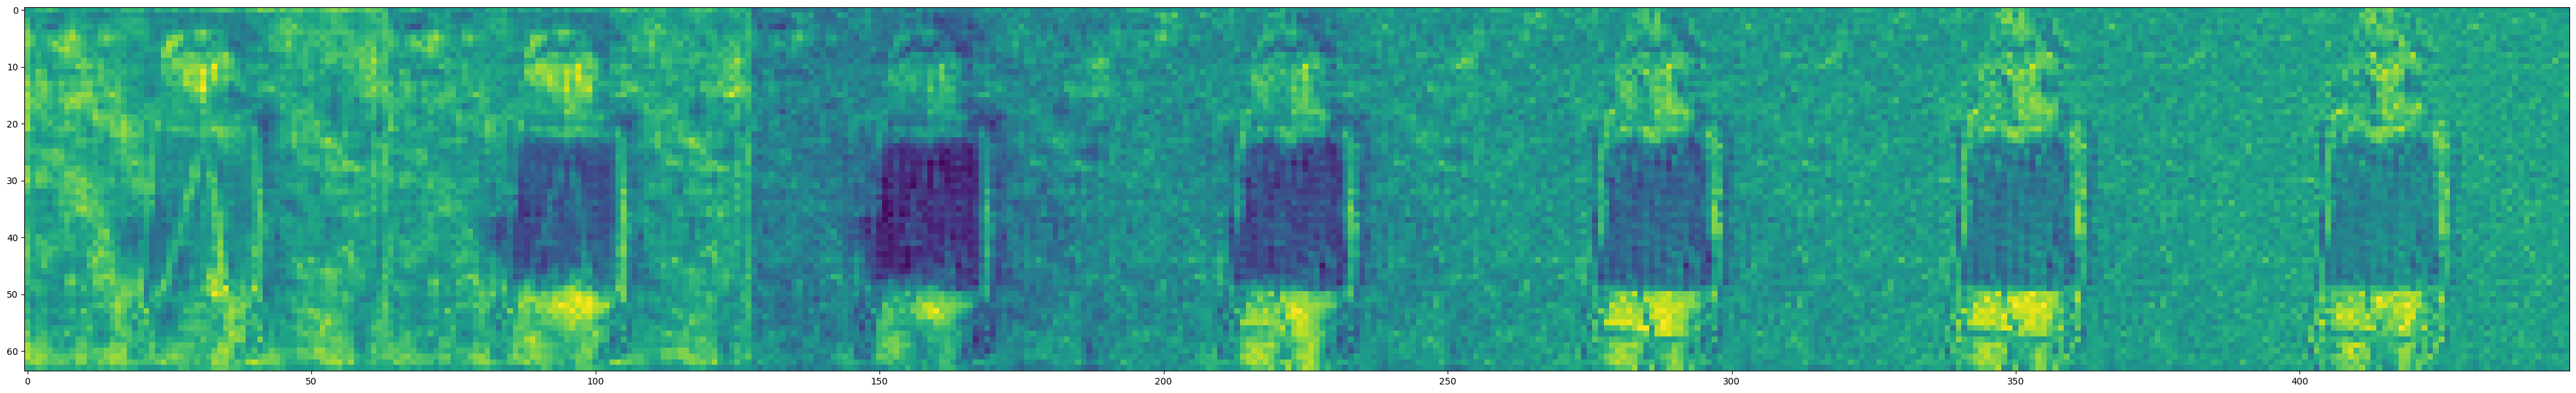

11


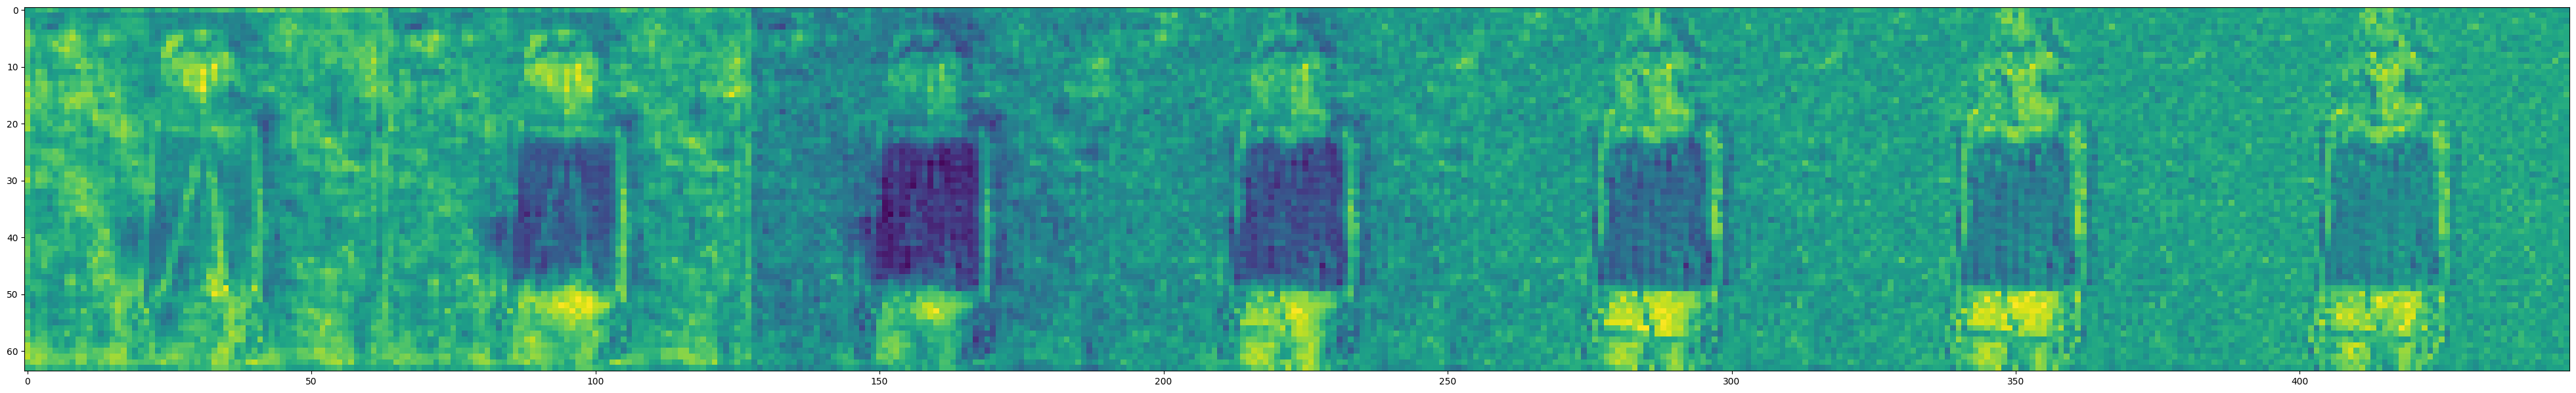

12


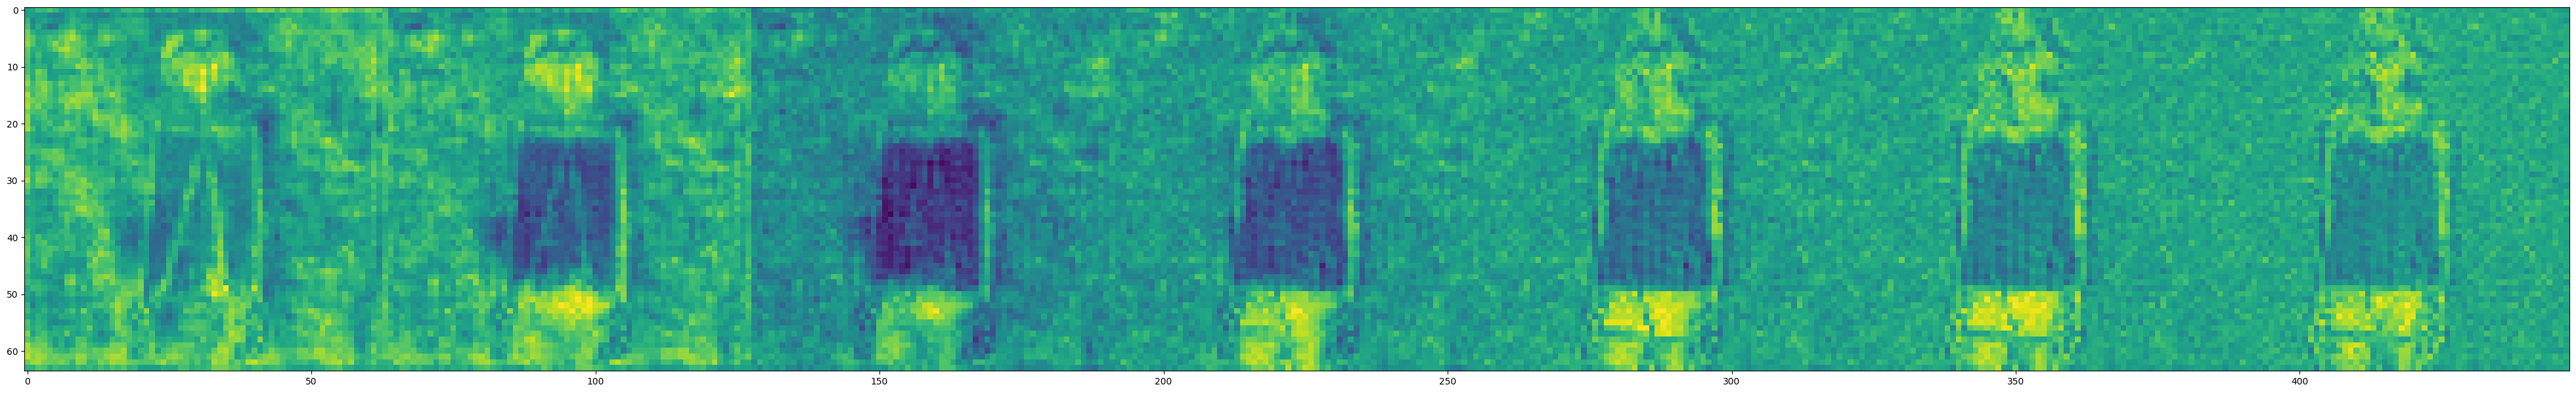

13


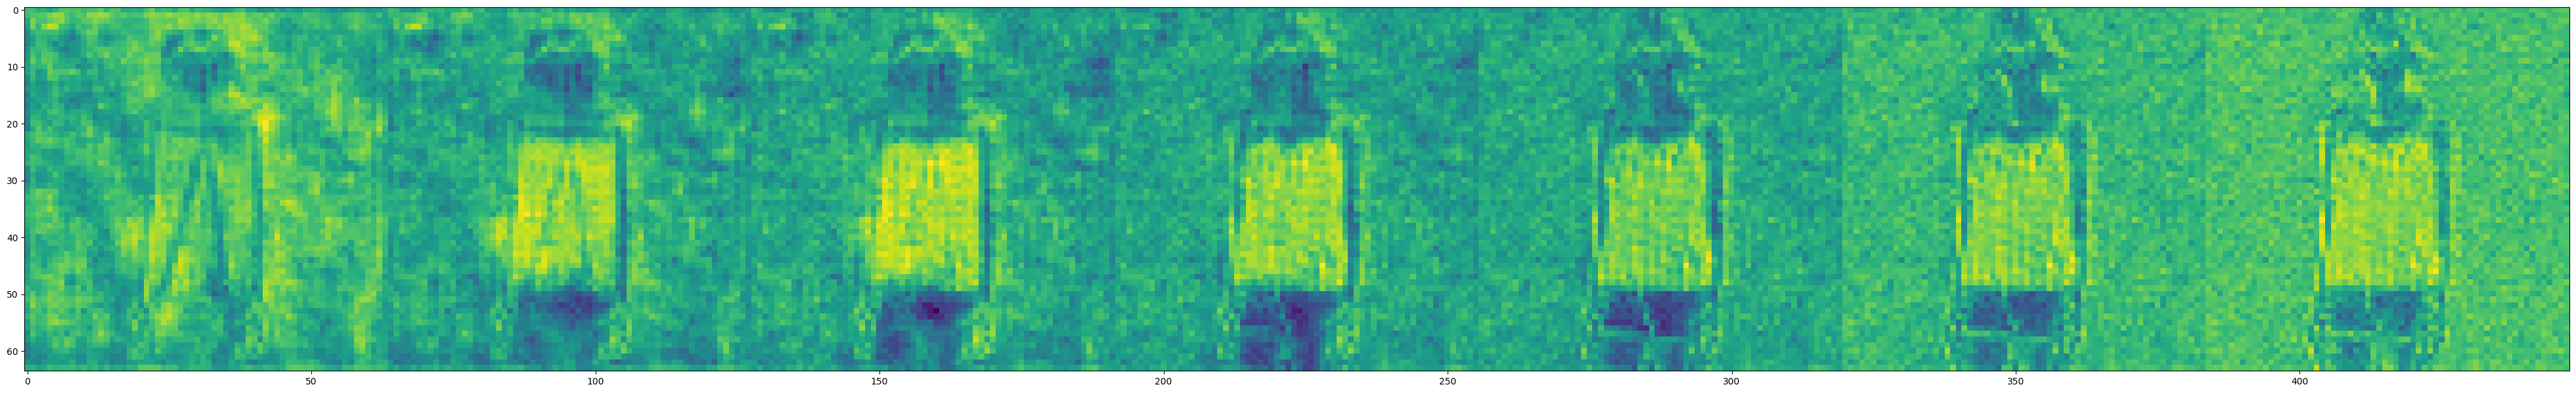

14


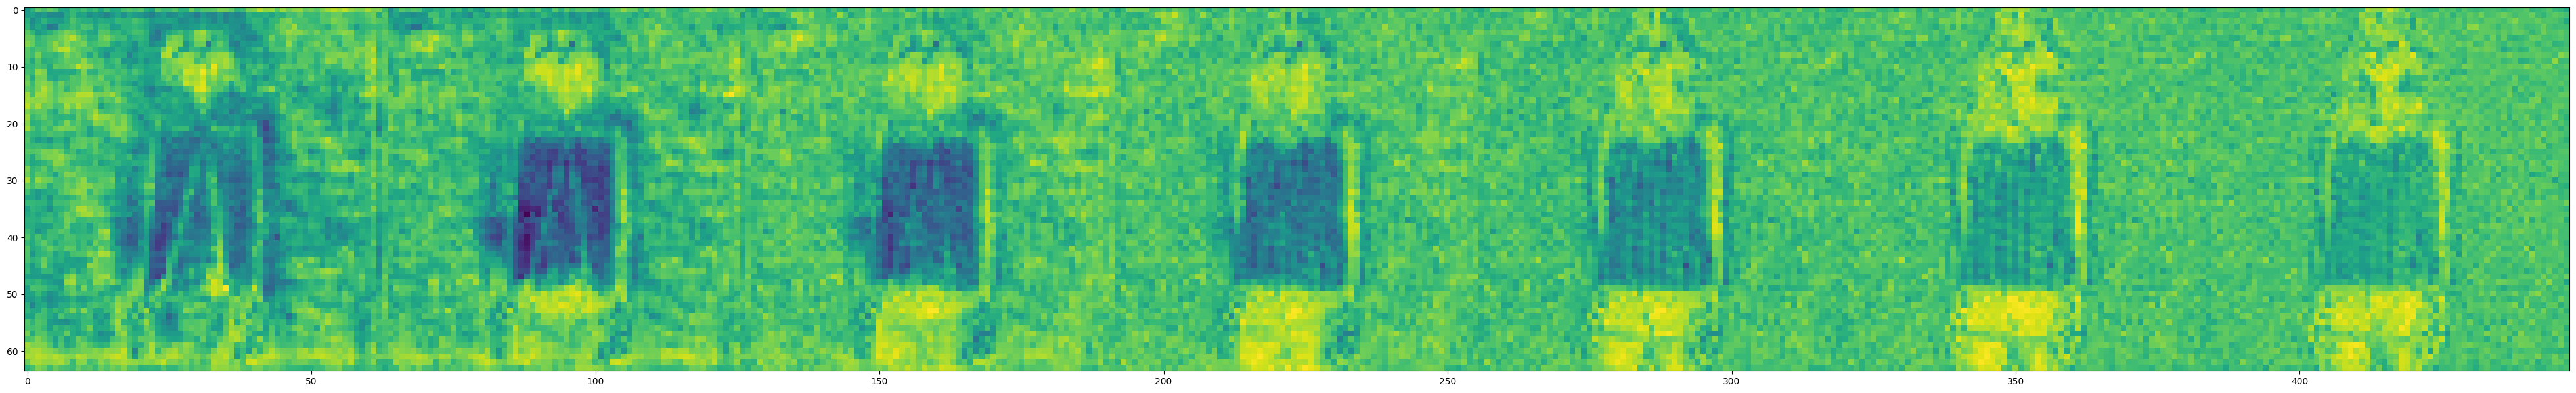

15


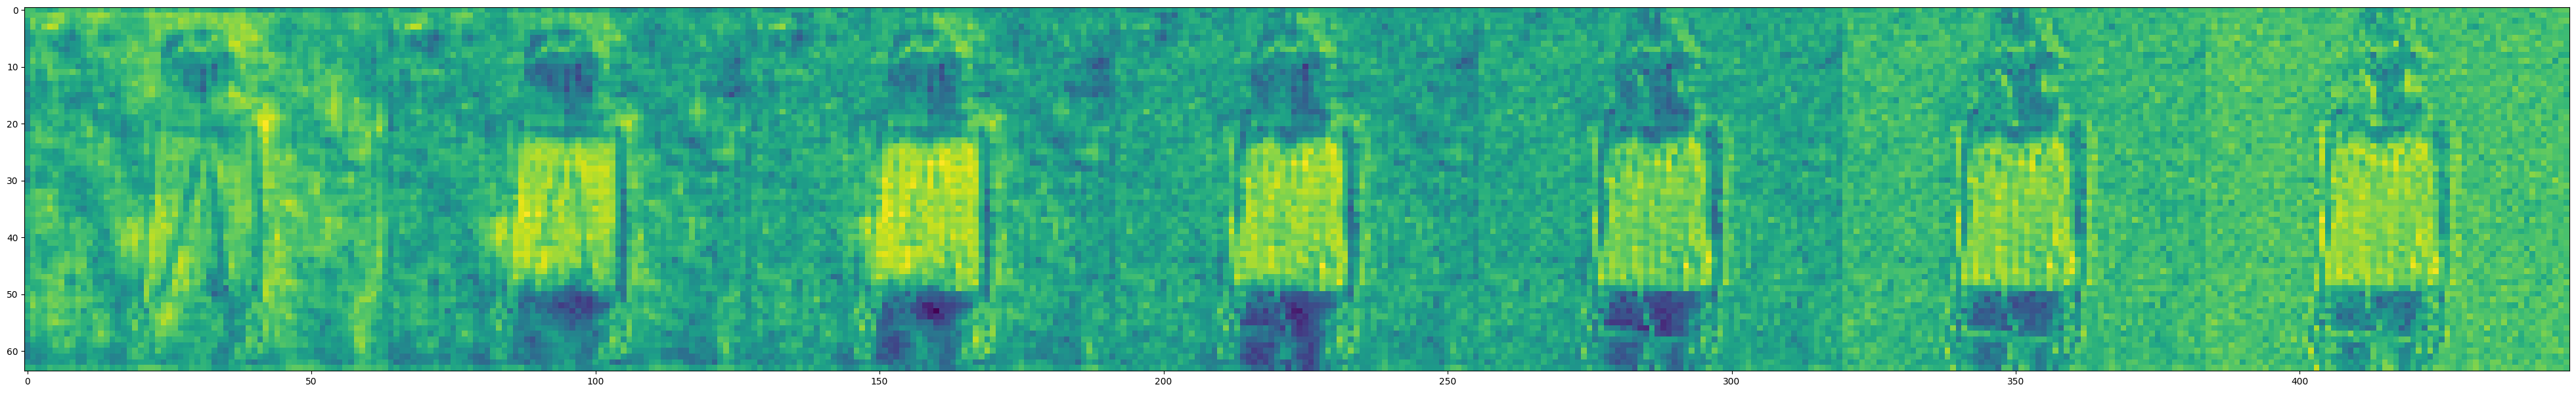

16


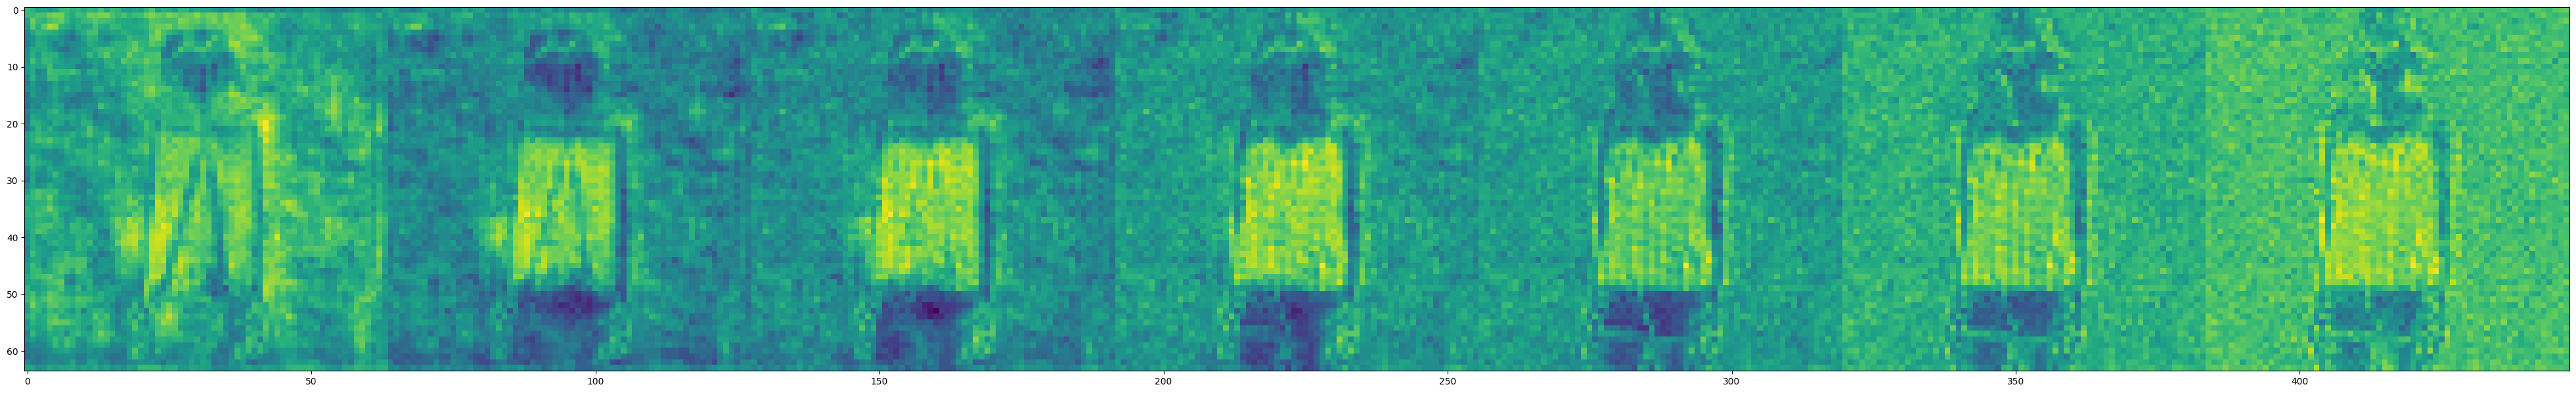

17


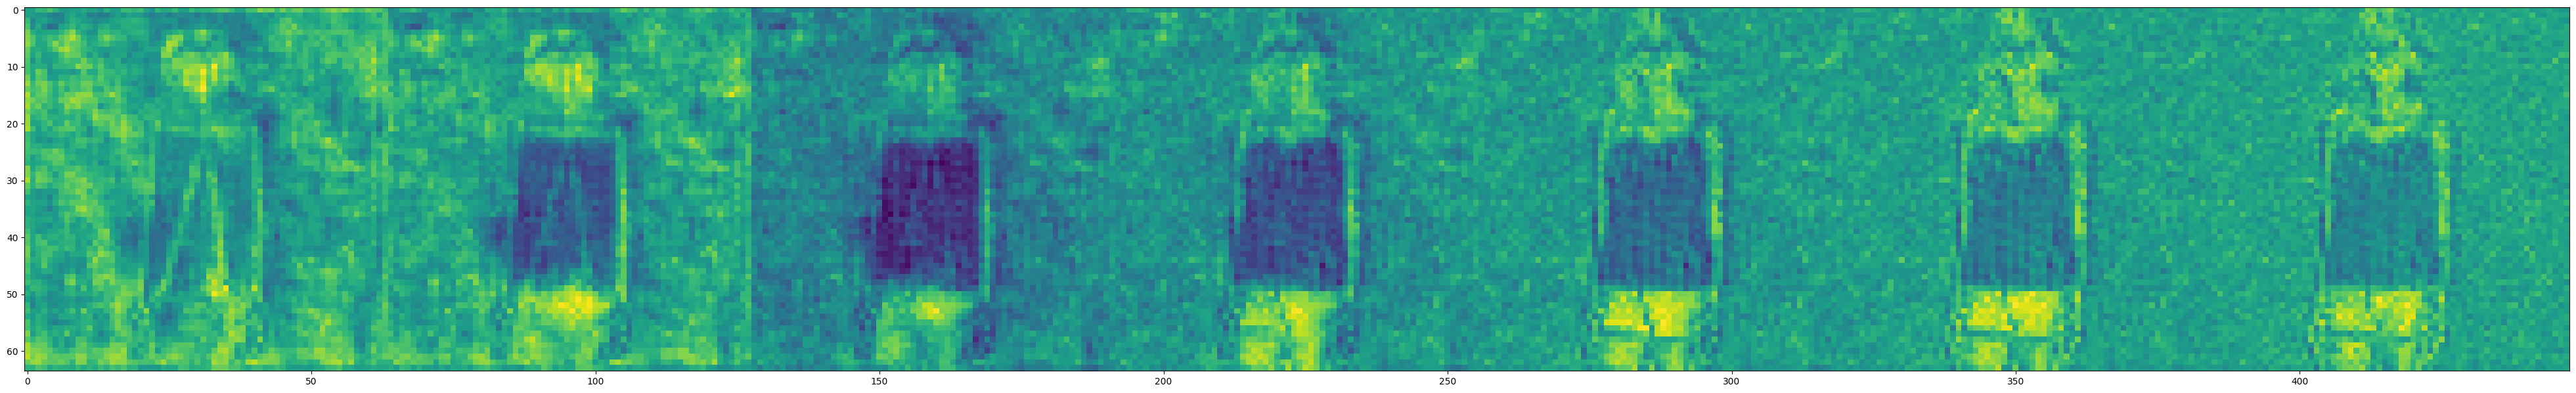

18


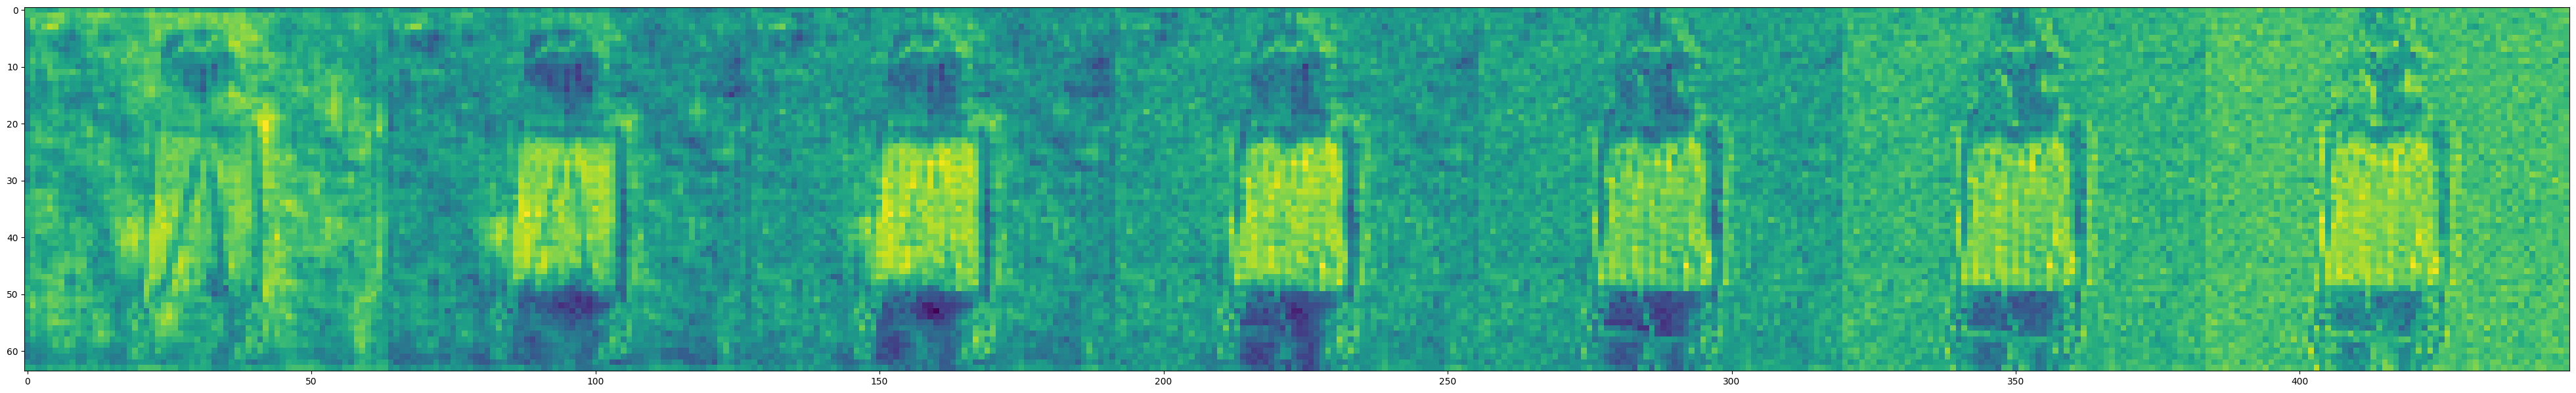

19


In [214]:
for part in range(0,20):
    #print('part', style_names[part])
    cmaps = []
    for i in range(951,1,-150):
        pickle_filename = f'../logs/cross/cross_step_{i}.p'
        with open(pickle_filename, 'rb') as pickle_file:
            cross_map = pickle.load(pickle_file)
        cmap = cross_map[1]
        pixels = cmap.shape[1]
        res = int(np.sqrt(pixels))
        cmap = cmap.view(-1, pixels,  8, 9)
        cmap = cmap.mean((0))
        cmap = F.normalize(cmap, p=float('inf'), dim=0)
        cmap = cmap.view(res, res, -1).cpu().numpy()

        cmaps.append(cmap[:,:,part*1:(part+1)*1].mean(-1))
    plt.figure(figsize=(50,50))
    plt.imshow(np.hstack(cmaps))
    #plt.title(f'{part}')
    plt.show()
    print(part)
    

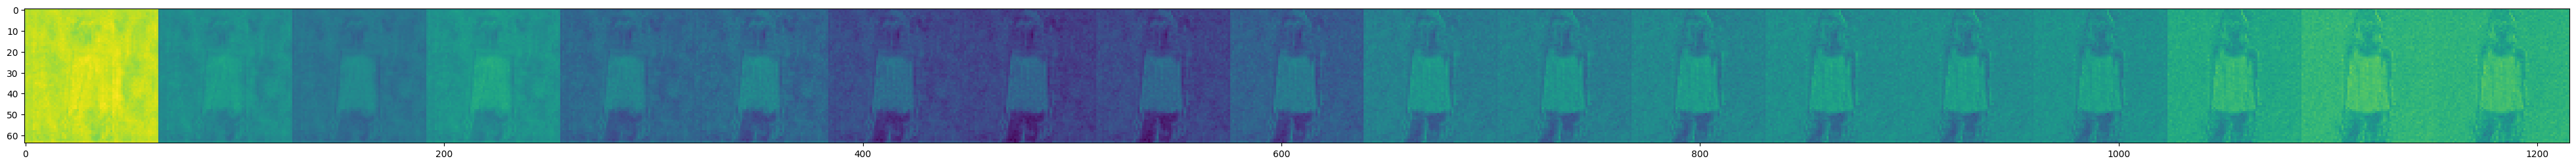

face


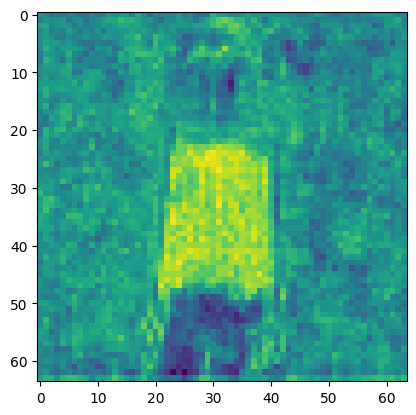

hair


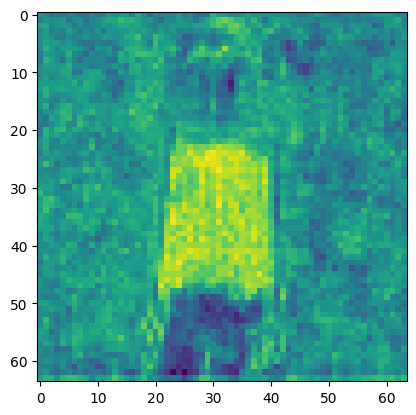

headwear


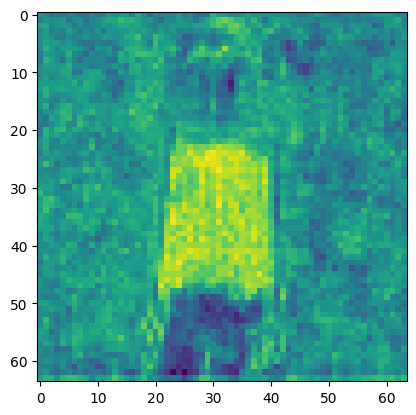

top


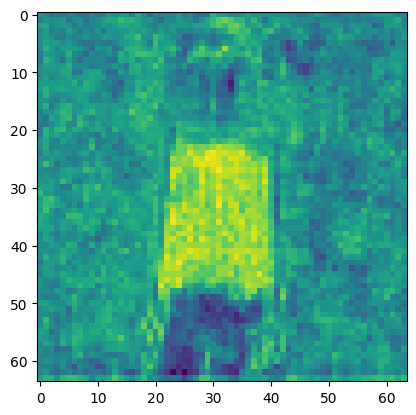

outer


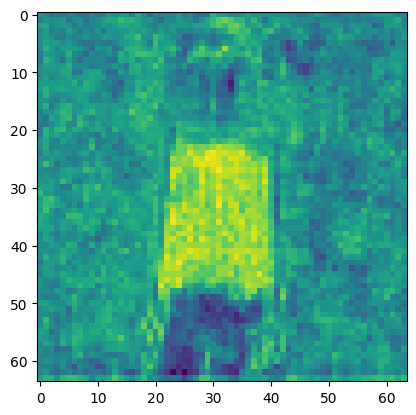

bottom


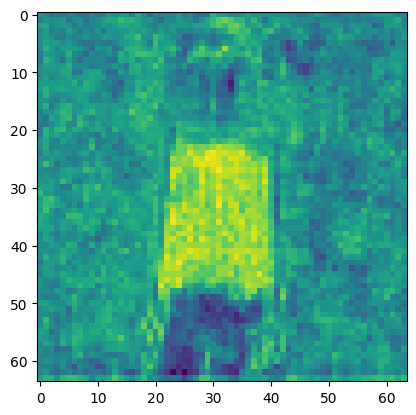

shoes


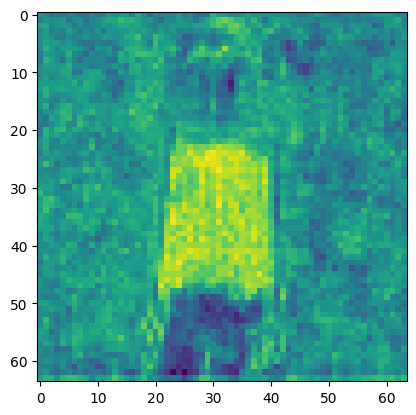

accesories


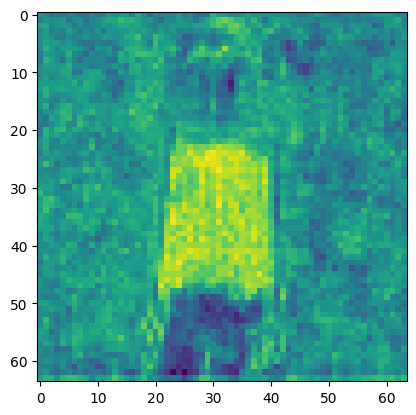

In [163]:
for i in range(8):
    print(style_names[i])
    plt.imshow(cmap[:,:,i*9:(i+1)*9].mean(-1))
    plt.show()

In [68]:

cmap = Softmax()(cmap)
#print(cmap.shape)
#print(Softmax(dim=-1)(cmap).shape)
F.normalize(tensor_to_normalize, p=float('inf'), dim=0)

/tmp/ipykernel_140124/2371875719.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  cmap = Softmax()(cmap)


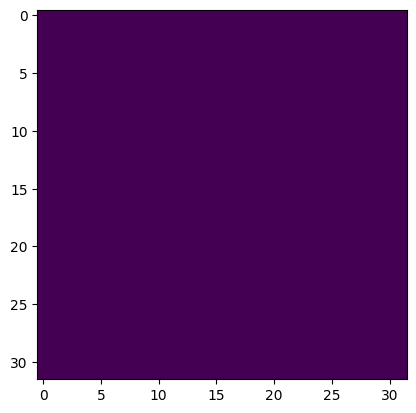

In [74]:
plt.imshow(Softmax(dim=1)(cmap[:,:,0]).cpu().numpy())

In [58]:
cmap[:,:,2].cpu().numpy().max()

0.013888891

In [8]:
np.sqrt(1024)

32.0

In [9]:
cmap.view(10,32, 32, 72)

tensor([[[[0.0162, 0.0114, 0.0167,  ..., 0.0142, 0.0125, 0.0101],
          [0.0162, 0.0114, 0.0167,  ..., 0.0142, 0.0125, 0.0101],
          [0.0162, 0.0114, 0.0167,  ..., 0.0142, 0.0126, 0.0102],
          ...,
          [0.0163, 0.0113, 0.0168,  ..., 0.0142, 0.0125, 0.0100],
          [0.0162, 0.0114, 0.0168,  ..., 0.0142, 0.0125, 0.0101],
          [0.0162, 0.0114, 0.0168,  ..., 0.0142, 0.0125, 0.0101]],

         [[0.0161, 0.0115, 0.0166,  ..., 0.0142, 0.0126, 0.0102],
          [0.0160, 0.0116, 0.0165,  ..., 0.0142, 0.0126, 0.0104],
          [0.0158, 0.0118, 0.0163,  ..., 0.0142, 0.0128, 0.0107],
          ...,
          [0.0159, 0.0118, 0.0163,  ..., 0.0142, 0.0127, 0.0106],
          [0.0160, 0.0116, 0.0165,  ..., 0.0142, 0.0127, 0.0104],
          [0.0160, 0.0116, 0.0165,  ..., 0.0142, 0.0127, 0.0104]],

         [[0.0160, 0.0117, 0.0164,  ..., 0.0142, 0.0127, 0.0105],
          [0.0157, 0.0119, 0.0161,  ..., 0.0142, 0.0128, 0.0109],
          [0.0157, 0.0119, 0.0161,  ..., 0